# Sympy: symbolic computing 

In [1]:
# convention
import numpy as np
import scipy as sp
import scipy.linalg as la 
# The top-level components of scipy (such as linalg, optimize, etc.) are so-called subpackages and not modules (i.e., they're directories, not source code). 
# Scipy is set up such that subpackages must be imported separately.sp.linalg won't work
import sympy as sym
sym.init_printing() # for printing latex/mathjax format output

In [2]:
# plotting
import matplotlib as mpl
# matplotlib for ploting
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D     # 3d
# for inline interactive plotting
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## The scientific python software stack

![](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/images/scientific-python-stack.png)



http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb

## Numerical Computation
Exact arithmetic and computer arithmetic do not always give the same answers (even in programs without programming errors).

In [172]:
1/3+1/2 == 5/6

False

In [173]:
1/3+1/2

In [174]:
5/6

## Symbolic Computation
Sympy provides symbolic computation like Maple.

In [175]:
sym.Rational(1,3) + sym.Rational(1,2)

In [176]:
sym.Rational(1,3) + sym.Rational(1,2) == sym.Rational(5,6) 

True

 ## the IS-LM Model
 
 $$A x = b$$

In [3]:
A = np.matrix([[1, 0.0005], [1, -0.00025]])
A

matrix([[  1.00000000e+00,   5.00000000e-04],
        [  1.00000000e+00,  -2.50000000e-04]])

```python
np.matrix()
```
returns a matrix from an array-like object, or from a string of data. A [matrix](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html) is a specialized 2-D array that retains its 2-D nature through operations. It has certain special operators, such as * (matrix multiplication) and ** (matrix power).

Numpy [array](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html) is more versatile and can be high dimension.


Like a Numpy array, matrix has some fields/attributes: `shape, ndim, size`.

In [4]:
b = np.matrix([[0.55], [-0.2]])
b

matrix([[ 0.55],
        [-0.2 ]])

## Linear algebra in Sympy

In [5]:
# rename A and b
M = sym.Matrix(A)
v = sym.Matrix(b)
M

⎡1.0   0.0005 ⎤
⎢             ⎥
⎣1.0  -0.00025⎦

In [6]:
v

⎡0.55⎤
⎢    ⎥
⎣-0.2⎦

## Method 1

In [7]:
M.inv("LU") # using LU Method to solve inverse, more efficient

⎡0.333333333333333  0.666666666666667⎤
⎢                                    ⎥
⎣1333.33333333333   -1333.33333333333⎦

In [8]:
M.inv() # the same. 
# In SymPy the inverse is computed by Gaussian elimination by default

⎡0.333333333333333  0.666666666666667⎤
⎢                                    ⎥
⎣1333.33333333333   -1333.33333333333⎦

In [10]:
M.inv("LU")*v 

⎡ 0.05 ⎤
⎢      ⎥
⎣1000.0⎦

## Method 2

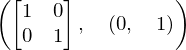

In [184]:
M.rref()

#### RREF
To put a matrix into reduced row echelon form, use `rref`. `rref` returns a tuple of two elements. The first is the reduced row echelon form, and the second is a tuple of indices of the pivot columns.

pivot columns is corresponding to the perm matrix.

In [11]:
M.LUdecomposition()

⎛⎡ 1   0⎤, ⎡1.0   0.0005 ⎤, []⎞
⎜⎢      ⎥  ⎢             ⎥    ⎟
⎝⎣1.0  1⎦  ⎣ 0   -0.00075⎦    ⎠


Returns (L, U, perm) where L is a lower triangular matrix with unit diagonal, U is an upper triangular matrix, and perm is a list of row swap index pairs. If A is the original matrix, then A = (L*U).permuteBkwd(perm), and the row permutation matrix P such that P*A = L*U can be computed by P=eye(A.row).permuteFwd(perm).

$$P*A = L*U$$

See documentation for LUCombined for details about the keyword argument rankcheck, iszerofunc, and simpfunc.

http://docs.sympy.org/latest/modules/matrices/matrices.html

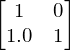

In [186]:
L,U,perm = M.LUdecomposition()
L

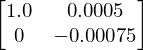

In [187]:
U

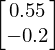

In [188]:
# If LHS A is multiplied by perm, RHS v should be done once.
v = v.permuteBkwd(perm)
v

the elements of x can be computed recursively using forward-substitution

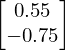

In [189]:
L.LUsolve(v)

Continue with a backward substitution. U is an upper triangular matrix, then the elements of x can be computed recursively using backward-substitution.

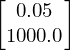

In [190]:
U.LUsolve(L.LUsolve(v))

In [191]:
A = [[sym.Symbol('m{0}{1}'.format(i,j)) 
      for i in range(1,4)] 
     for j in range(1,4) ]
A

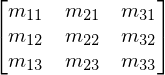

In [192]:
A=sym.Matrix(A)
A

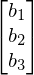

In [193]:
b = sym.Matrix([sym.Symbol('b{0}'.format(i)) 
      for i in range(1,4)])
b

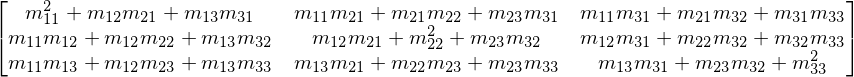

In [194]:
A**2

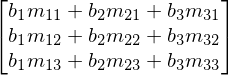

In [195]:
A * b # column space of A

In [196]:
A.det()

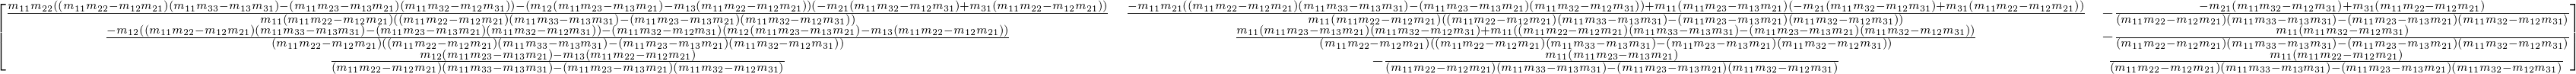

In [197]:
A.inv()

## More Sympy

ref:

http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb

In [16]:
x = sym.Symbol('x', real=True)

In [17]:
x = sym.Symbol('x', positive=True)

## Numerical evaluation
SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [12]:
sym.pi

In [15]:
sym.pi.evalf(n=5)

In [20]:
y = (x + sym.pi)**2
sym.N(y, 5) # same as evalf

In [21]:
y

In [22]:
type(y)

sympy.core.power.Pow

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [23]:
y.subs(x, 1.5)

In [24]:
 (x + sym.pi)**2

a much more efficient way to do it: Use the function `lambdify` to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [25]:
f_np = sym.lambdify([x], (x + sym.pi)**2, 'numpy')  # the first argument is a list of variables that
                                         # f will be a function of: in this case only x -> f(x)

In [26]:
f_np

<function numpy.<lambda>>

In [27]:
f_np(3)

## Solving equations

In [30]:
# alternative way of defining symbols
x,n,t,r, Y, C1, C2 = sym.symbols("x,n,t, r, Y, C1, C2")

In [31]:
f = sym.Function("f")

In [33]:
type(f)

sympy.core.function.UndefinedFunction

In [34]:
f(x)

In [35]:
f(t)

In [209]:
f(x),f(t)

### IS-LM problem

In [39]:
eq1 = sym.Eq(1*r+ 0.0005*Y, 0.55 )
eq1

In [40]:
eq1 = sym.Eq(1*r+ 0.0005*Y-0.55)
eq1

In [41]:

eq2 = sym.Eq(1*r- 0.00025*Y, -0.2 )
eq2

In [42]:
sym.solve([eq1, eq2], [r,Y])

It returns a dictionary. 

## Constrained Optimization with Lagrange multiplier

In [43]:
x = x1, x2, x3, l = sym.symbols("x1, x2, x3, lambda")

### Nonlinear Objective function

In [44]:
f = x1 * x2 * x3
f

### Nonlinear Constraints

In [46]:
g = 2 * (x1 * x2 + x2 * x3 + x3 * x1)
g

### Lagrange

In [47]:
L = f + l *(1- g)
L

### FOC

In [48]:
sym.diff(L, x1)

In [49]:
sym.diff(L, x2)

In [52]:
grad_L_test = []
for x_ in x:
    grad_L_test.append(sym.diff(L, x_)) 
grad_L_test  

In [54]:
grad_L = [sym.diff(L, x_) for x_ in x] # List of FOCs
grad_L

### Solve system of FOCs

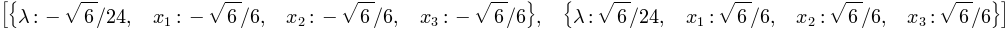

In [55]:
sols = sym.solve(grad_L)
sols

Two sets of solutions in which we need to check the SOCs.

### Check constraints

In [218]:
g.subs(sols[0])

### Check objective function value

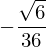

In [219]:
f.subs(sols[0])

In [220]:
f.subs(sols[1])

In [221]:
x[:3]

### Check SOC

In [222]:
from sympy.tensor.array import derive_by_array

In [223]:
grad_f =derive_by_array(f, x[:3])
grad_f 

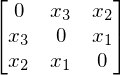

In [224]:
hess_f =derive_by_array(grad_f ,x[:3])
hess_f

In [225]:
type(hess_f)

sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray

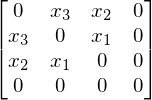

In [235]:
hess_f =sym.Matrix([[f.diff(x1_).diff(x2_) 
                     for x1_ in x] 
                    for x2_ in x])
hess_f

### Bordered Hessian Matrix

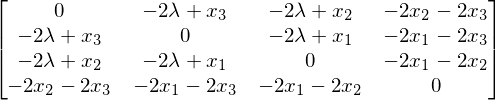

In [236]:
hess_L =derive_by_array(grad_L ,x)
hess_L

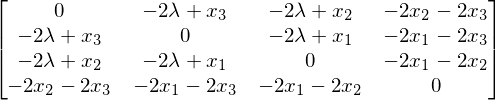

In [237]:
hess_L =sym.Matrix([[L.diff(x1_).diff(x2_) 
                     for x1_ in x] 
                    for x2_ in x])
hess_L

In [238]:
type(hess_L)

sympy.matrices.dense.MutableDenseMatrix

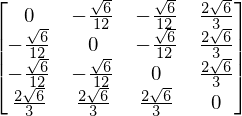

In [239]:
hess_L.subs(sols[0])

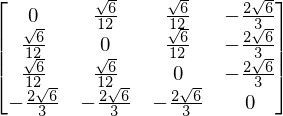

In [240]:
hess_L.subs(sols[1])

### Eigenvalues

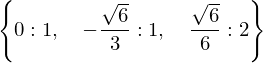

In [241]:
hess_f.subs(sols[0]).eigenvals() #returns eigenvalues and their algebraic multiplicity 
# https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Algebraic_multiplicity

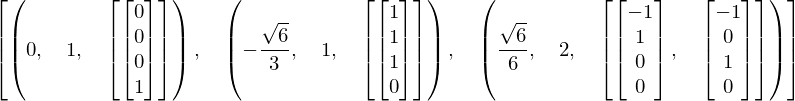

In [242]:
hess_f.subs(sols[0]).eigenvects()  #returns eigenvalues,algebraic multiplicity,and eigenvects

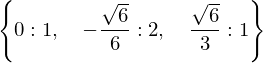

In [243]:
hess_f.subs(sols[1]).eigenvals()

## Difference equations

In [56]:
b,c,d, n, y0 = sym.symbols("b c d n y0")
y = sym.Function("y")

In [57]:
ode=sym.Eq(y(n+1) + c*y(n), d)
ode

In [58]:
ode_sol=sym.rsolve(ode,y(n))
ode_sol

In [59]:
ics = {y(0): y0}
ics #initial condition 

In [60]:
C_eq = sym.Eq(y(n).subs(n, 0).subs(ics), ode_sol.subs(n, 0))
C_eq

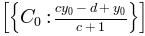

In [61]:
C_sol = sym.solve(C_eq)
C_sol

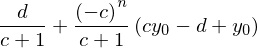

In [250]:
ode_sol.subs(C_sol[0])

## Differential equations

In [62]:
a, t, y0 = sym.symbols("a t y0")
y = sym.Function("y")

In [63]:
ode=sym.Eq(y(t).diff(t), a*y(t))
ode

- y: money in bank
- a: interest rate, for example 6%
- t: time year

In [66]:
ode_sol=sym.dsolve(ode, y(t), hint="separable")
ode_sol

In [67]:
ics = {y(0): y0}

In [68]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sym.solve(eqs, free_params)
    return sol.subs(sol_params)

In [69]:
apply_ics(ode_sol, ics, t, [a])

## Integration

In [71]:
from sympy import oo
x = sym.symbols('x')
sym.integrate(sym.exp(-x**2), (x, -oo, oo))

In [72]:
sym.exp(-x**2)

`oo` is the SymPy notation for inifinity.

In [73]:
x, y, z = sym.symbols("x,y,z")
f = sym.sin(x*y) + sym.cos(y*x)


In [74]:
sym.integrate(f, (x, -1, 1))

  ⎛⎧   -1     for y = 0⎞   ⎛⎧  1     for y = 0⎞
  ⎜⎪                   ⎟   ⎜⎪                 ⎟
- ⎜⎨-sin(y)            ⎟ + ⎜⎨sin(y)           ⎟
  ⎜⎪────────  otherwise⎟   ⎜⎪──────  otherwise⎟
  ⎝⎩   y               ⎠   ⎝⎩  y              ⎠

### Sums and products
We can evaluate sums and products using the functions: 'Sum'

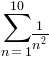

In [75]:
sym.Sum(1/n**2, (n, 1, 10))

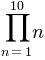

In [76]:
sym.Product(n, (n, 1, 10)) # 10!

## Limits 
Limits can be evaluated using the `limit` function. For example, 

In [77]:
sym.limit(sym.sin(x)/x, x, 0)

We can change the direction from which we approach the limiting point using the `dir` keywork argument:

In [78]:
sym.limit(1/x, x, 0, dir="+")

In [79]:
sym.limit(1/x, x, 0, dir="-")

## Series expansion
Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

https://en.wikipedia.org/wiki/Big_O_notation

In [80]:
sym.series(sym.exp(x), x)

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

In [81]:
sym.series(sym.exp(x), x, 1)

And we can explicitly define to which order the series expansion should be carried out:

In [82]:
sym.series(sym.exp(x), x, 0,10)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different order:

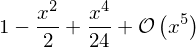

In [273]:
s1 = sym.cos(x).series(x, 0, 5)
s1

In [274]:
s2 = sym.sin(x).series(x, 0, 2)
s2

In [275]:
sym.expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

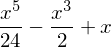

In [276]:
sym.expand(s1.removeO() * s2.removeO())

But note that this is not the correct expansion of $\cos(x)\sin(x)$ to $5$th order:

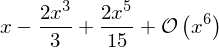

In [277]:
(sym.cos(x)*sym.sin(x)).series(x, 0, 6)

Check the order of a function

In [278]:
sym.O(x+x**2)

In [1]:
from IPython.core.display import HTML, Image
css_file = '../../custom.css'
HTML(open(css_file, 'r').read())